# Лабораторна робота2

## Завдання

1. Поглиблено вивчити функцію [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression).
2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів. 
3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком.
4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
5. Результати оформити у вигляді файлів:
- набір даних у форматі .csv
- код для формування набору даних у форматі .ipynb
- код для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab2).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)


#### 1. Поглиблено вивчити функцію make_regression

In [1]:
from sklearn.datasets import make_regression

#### 2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів.
#### 3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком.

In [2]:
seed = 42
n = 13

In [3]:
X, y = make_regression(n_samples=100000,
                       n_features=30-n,
                       n_informative=5,
                       n_targets=1,
                       bias=3,
                       tail_strength=0.2,
                       noise=1,
                       random_state=seed)

In [4]:
df = make_regression(n_samples=100000,
                       n_features=30-n,
                       n_informative=5,
                       n_targets=1,
                       bias=3,
                       tail_strength=0.2,
                       noise=1,
                       random_state=seed)

In [5]:
y = y.reshape(-1, 1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [10]:
# Data normalization
X_train_norm = X_scaler.fit_transform(X_train)
y_train_norm = y_scaler.fit_transform(y_train)

#### 4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів. 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg_model = LinearRegression()

In [13]:
reg_model.fit(X_train_norm, y_train_norm)

LinearRegression()

In [14]:
X_test_norm = X_scaler.transform(X_test)
y_test_norm = y_scaler.transform(y_test)

In [15]:
y_pred_norm = reg_model.predict(X_test_norm)

In [16]:
y_pred = y_scaler.inverse_transform(y_pred_norm)

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

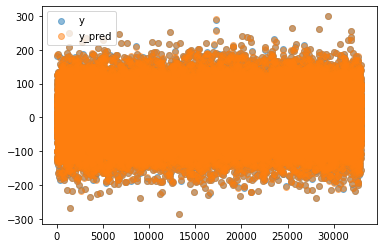

In [18]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(range(y_test.size), y_test, label='y', alpha=0.5)
ax1.scatter(range(y_pred.size), y_pred, label='y_pred', alpha=0.5)
ax1.legend()

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_test, y_pred)

1.009448984154723

#### 5. Результати оформити у вигляді файлів: 

In [21]:
import pandas as pd

In [29]:
df = pd.DataFrame(X)
df = df.add_prefix('x_')

In [30]:
df['y'] = y

In [31]:
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,y
0,-1.281945,1.150160,0.668352,0.451798,1.086872,-1.669124,0.066746,1.980057,0.188797,-0.405220,-0.793942,-0.194390,-1.316785,-0.443777,-0.617069,0.400964,1.204022,-54.172520
1,0.756856,0.492796,0.097852,-0.868774,-1.090707,-1.884179,-0.263088,-0.627859,0.592877,-1.596132,-0.475349,-0.242926,-1.045868,-0.955263,0.282620,-0.409523,0.071806,-132.370735
2,0.924706,-1.952950,-1.580409,0.537616,2.646757,-0.605673,0.462254,-1.818717,3.149244,-0.604977,0.145607,0.013201,-0.131755,0.355076,-1.934267,-1.213557,-0.958991,-34.347275
3,-0.794167,-0.721986,0.359497,-0.249510,1.019451,-1.781083,-2.951203,-0.088449,0.095067,1.194554,-0.806103,-0.470169,0.376373,-0.713881,-0.259197,-0.608128,-0.875259,-88.050020
4,0.776311,0.048423,-0.357443,-0.944826,0.056779,0.146068,-0.415003,1.129970,0.123279,0.880800,-0.350198,0.177505,-0.606494,0.481315,0.786609,-0.195241,0.295431,16.458856


In [32]:
df.to_csv('make_regression_df.csv')